# WeatherPy
----

In [145]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import csv

# Import API key. Use personal API.
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [146]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [147]:
# Create function to print a processing log string. 
# Using this function keeps the log printing action within the for loops concise.
def logprint(e,n):
    print("Processing Record " + str(e+1) +"| City :"+ n)

# Determine if estimated duration should be displayed in min or hr. Each call sleeps for 1s after completing.
# If each call was exactly 1s duration, 3600 calls would complete in 1hr(1hr = 3600s). 
# Seconds multiplier adjusted to 1.5 as actual duration >1s.
if len(cities) >= 3600:
    duration = str(round((len(cities) * 1.5)/(60*60), 1))+ "hrs"
else:
    duration = str(round((len(cities)* 1.5)/60, 1))+"min"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [149]:
# Log header
header = '''
Beginning Data Retrieval
------------------------
Estimated duration: ''' + duration + '''
==================================='''
print(header)

# INIT lists to store data used to create a DF. The resulting DF will be used for plotting.
city_names = []
cloudiness = []
countries = []
dates = []
humidity = []
lats = []
lngs = []
maxtemps = []
windspeeds = []

# Define unit variable to use in URL formatting.
units = "imperial"
skipped_count = 0

# Track date & time when data requests were made. date_string var be appended to the analysis plots.
# Explored datetime option. settled on this method.
# Ref: https://stackoverflow.com/questions/3961581/in-python-how-to-display-current-time-in-readable-format
date_run = time.strftime('%X %x %Z')
date_string = " Analysis Run on date: " + str(date_run)

for i in range(len(cities)):
    logprint(i,cities[i])
    # Build query URL and request your results in Celsius
    location = cities[i]
    url = "http://api.openweathermap.org/data/2.5/weather?"

    # query_url = "{}appid={}&q={}".format(url,api_key,location)
    # Alternative URL string format^^^ Also works.
    
    # Format URL
    query_url2 = "{}&q={}&appid={}&units={}".format(url,location,api_key,units)
    # Get weather data
    response_json = requests.get(query_url2).json()
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    try:
        city_names.append(response_json["name"])
        cloudiness.append(response_json['clouds']['all'])
        countries.append(response_json['sys']['country'])
        dates.append(response_json['dt'])
        humidity.append(response_json['main']['humidity'])
        lats.append(response_json['coord']['lat'])
        lngs.append(response_json['coord']['lon'])
        maxtemps.append(response_json['main']['temp_max'])
        windspeeds.append(response_json['wind']['speed'])
    except (KeyError, IndexError):
        # Track count skipped. Log skipped cities.
        skipped_count = skipped_count + 1
        print("City :" + cities[i] + " |Not found.Skipping..Cities Skipped: " + str(skipped_count))
    

    
# Log footer
footer = '''
-----------------------------
Data Retrieval Complete
-----------------------------'''
print(footer)


Beginning Data Retrieval
------------------------
Estimated duration: 15.5min
Processing Record 1| City :yellowknife
Processing Record 2| City :ponta do sol
Processing Record 3| City :summerside
Processing Record 4| City :lebu
Processing Record 5| City :carnarvon
Processing Record 6| City :saldanha
Processing Record 7| City :port alfred
Processing Record 8| City :east london
Processing Record 9| City :labuan
Processing Record 10| City :mattru
Processing Record 11| City :illoqqortoormiut
City :illoqqortoormiut |Not found.Skipping..Cities Skipped: 1
Processing Record 12| City :atuona
Processing Record 13| City :georgetown
Processing Record 14| City :flinders
Processing Record 15| City :hobyo
Processing Record 16| City :ampanihy
Processing Record 17| City :bredasdorp
Processing Record 18| City :boyolangu
Processing Record 19| City :rikitea
Processing Record 20| City :gravdal
Processing Record 21| City :san patricio
Processing Record 22| City :thompson
Processing Record 23| City :tuktoyak

Processing Record 180| City :adrar
Processing Record 181| City :hammerfest
Processing Record 182| City :saint george
Processing Record 183| City :quesnel
Processing Record 184| City :piacabucu
Processing Record 185| City :zhoukou
Processing Record 186| City :goya
Processing Record 187| City :vyshneve
Processing Record 188| City :nyurba
Processing Record 189| City :airai
Processing Record 190| City :victoria
Processing Record 191| City :tourlaville
Processing Record 192| City :pallasovka
Processing Record 193| City :puerto escondido
Processing Record 194| City :artyk
City :artyk |Not found.Skipping..Cities Skipped: 24
Processing Record 195| City :salacgriva
Processing Record 196| City :tsihombe
City :tsihombe |Not found.Skipping..Cities Skipped: 25
Processing Record 197| City :rodino
Processing Record 198| City :omsukchan
Processing Record 199| City :ust-nera
Processing Record 200| City :te anau
Processing Record 201| City :ossora
Processing Record 202| City :aquiraz
Processing Record 2

Processing Record 366| City :lixourion
Processing Record 367| City :nuuk
Processing Record 368| City :chor
Processing Record 369| City :maarianhamina
City :maarianhamina |Not found.Skipping..Cities Skipped: 44
Processing Record 370| City :provideniya
Processing Record 371| City :itaituba
Processing Record 372| City :nurota
Processing Record 373| City :ust-uda
Processing Record 374| City :lyubeshiv
City :lyubeshiv |Not found.Skipping..Cities Skipped: 45
Processing Record 375| City :kita
Processing Record 376| City :kaniama
Processing Record 377| City :vidalia
Processing Record 378| City :lexington park
Processing Record 379| City :oranjestad
Processing Record 380| City :kaoma
Processing Record 381| City :alice springs
Processing Record 382| City :cervo
Processing Record 383| City :viedma
Processing Record 384| City :astaneh-ye ashrafiyeh
Processing Record 385| City :jackson
Processing Record 386| City :porbandar
Processing Record 387| City :ukiah
Processing Record 388| City :haines junc

Processing Record 549| City :andarab
City :andarab |Not found.Skipping..Cities Skipped: 66
Processing Record 550| City :hermosillo
Processing Record 551| City :sarana
Processing Record 552| City :batticaloa
Processing Record 553| City :siocon
Processing Record 554| City :linkoping
Processing Record 555| City :mount isa
Processing Record 556| City :sarakhs
Processing Record 557| City :moroto
Processing Record 558| City :richards bay
Processing Record 559| City :maralal
Processing Record 560| City :quixada
City :quixada |Not found.Skipping..Cities Skipped: 67
Processing Record 561| City :lompoc
Processing Record 562| City :tawkar
City :tawkar |Not found.Skipping..Cities Skipped: 68
Processing Record 563| City :grand gaube
Processing Record 564| City :kampene
Processing Record 565| City :portales
Processing Record 566| City :balatonfoldvar
Processing Record 567| City :pacific grove
Processing Record 568| City :simao
Processing Record 569| City :play cu
City :play cu |Not found.Skipping..C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [150]:
# Build Data frame. 
weather_df = pd.DataFrame({'City':city_names,"Country":countries,"Date":dates,
                          "Lat":lats,"Lng":lngs,"Temp":maxtemps,"Humidity":humidity,
                          "Wind Speed":windspeeds,"Cloudiness":cloudiness})
# Save Data Frame to CSV.
weather_df.to_csv("Weather_Data.csv")
# Display Data Frame.
weather_df.head()

,City,Country,Date,Lat,Lng,Temp,Humidity,Wind Speed,Cloudiness
0,Yellowknife,CA,1553881344,62.45,-114.38,28.00,73,6.93,75
1,Ponta do Sol,BR,1553881526,-20.63,-46.00,82.07,57,4.50,56
2,Summerside,CA,1553881522,46.39,-63.79,46.99,81,8.05,90
3,Lebu,ET,1553878800,8.96,38.73,71.60,35,11.41,75
4,Carnarvon,ZA,1553881533,-30.97,22.13,67.40,14,7.63,0


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


In [151]:
# Check counts for any odd discrepancies in data collection.

# DF .count() & len(cities) should return close to equal. If a difference exist, 
# the difference should be equal to the amount of skipped cities(= skipped_count var)
weather_df.count(),print("Cities searched: "+str(len(cities))+ " Total Skipped: "+ str(skipped_count))



Cities searched: 620 Total Skipped: 73


(City          547
 Country       547
 Date          547
 Lat           547
 Lng           547
 Temp          547
 Humidity      547
 Wind Speed    547
 Cloudiness    547
 dtype: int64, None)

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

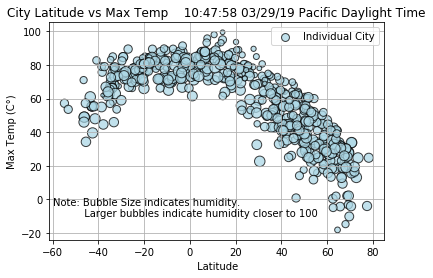

In [176]:
# Plot scatter

plt.scatter(weather_df['Lat'], weather_df['Temp'],s=(weather_df["Humidity"] + 10), color = 'lightblue', edgecolor = 'black', label = 'Individual City', alpha = .75, linewidth = 1)
plt.grid()
plt.title("City Latitude vs Max Temp    " + date_run)
plt.xlabel(" Latitude")
plt.ylabel("Max Temp (C°)")
plt.text(-60,-10, """Note: Bubble Size indicates humidity.
          Larger bubbles indicate humidity closer to 100""")
plt.legend(loc="best")

# Save figure
plt.savefig("images/Lat_V_Temp.png")


plt.show()

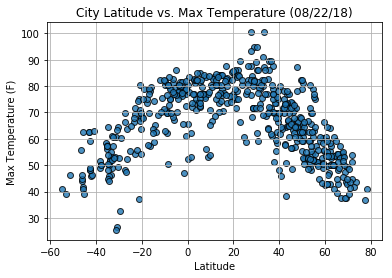

#### Latitude vs. Humidity Plot

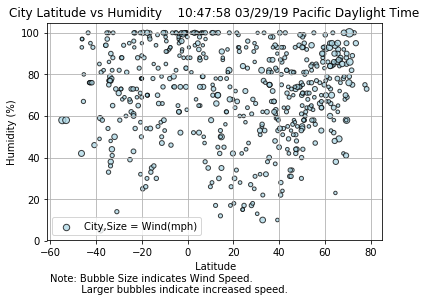

In [175]:
# Plot scatter.
plt.scatter(weather_df['Lat'], weather_df['Humidity'],s=(weather_df["Wind Speed"] + 10), color = 'lightblue', edgecolor = 'black', label = 'City,Size = Wind(mph)', alpha = .75, linewidth = 1)
plt.grid()
plt.title("City Latitude vs Humidity    " + date_run)
plt.xlabel(" Latitude")
plt.ylabel("Humidity (%)")


plt.legend(loc="best")

# Save figure
plt.savefig("images/Lat_V_Humidity.png")
plt.text(-60,-25,"""Note: Bubble Size indicates Wind Speed.
          Larger bubbles indicate increased speed.""")
plt.show()

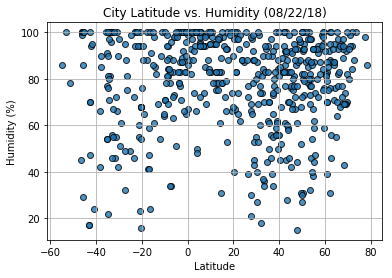

#### Latitude vs. Cloudiness Plot

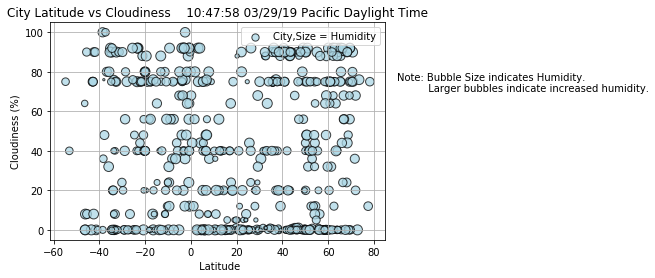

In [174]:
# Plot scatter.
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'],s=weather_df["Humidity"], color = 'lightblue', edgecolor = 'black', label = 'City,Size = Humidity', alpha = .75, linewidth = 1)
plt.grid()
plt.title("City Latitude vs Cloudiness    " + date_run)
plt.xlabel(" Latitude")
plt.ylabel("Cloudiness (%)")


plt.legend(loc="best")

# Save figure
plt.savefig("images/Lat_V_Cloudiness.png")
plt.text(90,70, """Note: Bubble Size indicates Humidity.
          Larger bubbles indicate increased humidity.""")
plt.show()

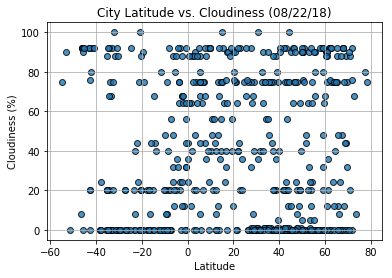

#### Latitude vs. Wind Speed Plot

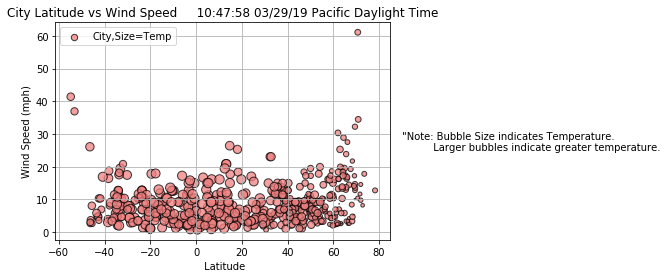

In [172]:
# Plot Scatter.
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'],s=(weather_df["Temp"]), color = 'lightcoral', edgecolor = 'black', label = 'City,Size=Temp', alpha = .75, linewidth = 1)
plt.grid()
plt.title("City Latitude vs Wind Speed     "+ date_run)
plt.xlabel(" Latitude")
plt.ylabel("Wind Speed (mph)")

plt.legend(loc="best")

# Save figure
plt.savefig("images/Lat_V_Windspeed.png")
plt.text(90,25, """"Note: Bubble Size indicates Temperature.
          Larger bubbles indicate greater temperature.""")
plt.show()

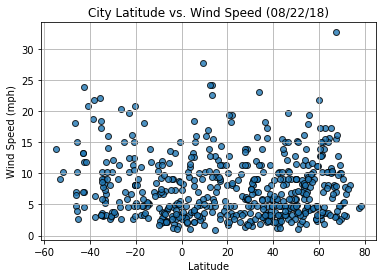